In [2]:
import os
import numpy as np
from base import *

In [4]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_01_06_2024_sametilesas12_03_2024_notGUI'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

Saving model metadata and classification colormap...
Max WS[2]: 7
Classnames: ['PDAC', 'bile duct', 'vasculature', 'hepatocyte', 'immune', 'stroma', 'whitespace']
Creating Net metadata file...


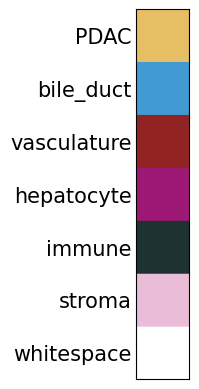

In [5]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [5]:
WSI2tif(pth, resolution, umpix)

In [6]:
# Determine optimal TA
determine_optimal_TA(pthim, nTA)

   
Evaluating 2 randomly selected images to choose a good whitespace detection...
   Optimal cutoff already chosen, skip this step


In [7]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 6: Liv-17_0001
 annotation data previously loaded
Image 2 of 6: Liv-17_0041
 annotation data previously loaded
Image 3 of 6: Liv-17_0081
 annotation data previously loaded
Image 4 of 6: Liv-17_0121
 annotation data previously loaded
Image 5 of 6: Liv-17_0161
 annotation data previously loaded
Image 6 of 6: Liv-17_0199
 annotation data previously loaded


In [8]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 544424100.0 pixels of PDAC, 47% of the most common class.
 There are 32228400.0 pixels of bile duct, 2% of the most common class.
 There are 92477300.0 pixels of vasculature, 8% of the most common class.
 There are 1155811000.0 pixels of hepatocyte. This is the most common class.
 There are 31894000.0 pixels of immune, 2% of the most common class.
 There are 812402300.0 pixels of stroma, 70% of the most common class.
 There are 816831000.0 pixels of whitespace, 70% of the most common class.

Building training tiles...
  Already done.
  Elapsed time to create training big tiles: 0.0h 0.0m 0.05800294876098633s


Building validation tiles...
Already done.
Elapsed time to create validation big tiles: 0.0h 0.0m 0.05399751663208008s


In [6]:
train_segmentation_model_cnns(pthDL)

No GPU available. Ensure that the NVIDIA GPU and CUDA are correctly installed.


KeyboardInterrupt: 

In [3]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

In [ ]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")

In [5]:
import tensorflow as tf
from keras import Input, Model
import numpy as np

# Define the input tensor
input_size = 224  # Example input size, replace with your actual input size
model_input = Input(shape=(input_size, input_size, 3))

# Preprocess the input tensor
preprocessed = tf.keras.applications.resnet50.preprocess_input(model_input)

# Get the maximum, minimum, mean, and standard deviation values of the preprocessed tensor
max_value = tf.reduce_max(preprocessed)
min_value = tf.reduce_min(preprocessed)
mean_value = tf.reduce_mean(preprocessed)
std_value = tf.math.reduce_std(preprocessed)

# Create a model to evaluate the tensor
model = Model(inputs=model_input, outputs=[max_value, min_value, mean_value, std_value])

# Generate some dummy data to feed into the model
dummy_data = np.random.random((1, input_size, input_size, 3))

# Evaluate the tensor to get the actual values
max_value_evaluated, min_value_evaluated, mean_value_evaluated, std_value_evaluated = model.predict(dummy_data)
print(f"Max value: {max_value_evaluated}")
print(f"Min value: {min_value_evaluated}")
print(f"Mean value: {mean_value_evaluated}")
print(f"Standard Deviation: {std_value_evaluated}")

TypeError: Could not build a TypeSpec for name: "tf.print_4/PrintV2"
op: "PrintV2"
input: "tf.print_4/StringFormat"
attr {
  key: "end"
  value {
    s: "\r\n"
  }
}
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.